In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from string import ascii_letters

In [2]:
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn

def evaluate_model (model,x_test,y_test):
    y_predicted = model.predict(x_test)
    y_predicted = np.array([0 if prediction < 0.5 else 1 for prediction in y_predicted])
    cm = confusion_matrix(y_test, y_predicted)
    print(classification_report(y_test,y_predicted))
    tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
    
    #metrics
    print("True Negative: ",tn)
    print("False Positive: ",fp)
    print("False Negative: ",fn)
    print("True Negative: ",tp)
    
    tpr = tp/(tp+fn) #Recall
    tnr = tn/(tn+fp) #Specificity
    fnr = fn/(fn+tp)
    fpr = fp/(fp+tn)
    precision = tp/(tp+fp)
    
    print("True Positive Rate (Recall): ",tpr)
    print("True Negative Rate (Specificity): ",tnr)
    print("False Negative Rate: ",fnr)
    print("False Positive Rate: ",fpr)
    print("Precision: ",precision)
    
    #confusion matrix
    plt.figure(figsize=(14,8))
    sn.heatmap(cm, annot=True)
    plt.xlabel('Predicted', fontsize=24)
    plt.ylabel('Truth',fontsize=24)
    

Metrics = [
    keras.metrics.TruePositives(name = 'tp'),
    keras.metrics.FalsePositives(name = 'fp'),
    keras.metrics.TrueNegatives(name = 'tn'),
    keras.metrics.FalseNegatives(name = 'fn'),
    keras.metrics.BinaryAccuracy(name = "accuracy"),
    keras.metrics.Precision(name = 'precision'),
    keras.metrics.Recall(name = 'recall')
    
]

2023-05-19 09:01:49.804713: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-19 09:01:49.804739: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-19 09:01:51.823437: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-19 09:01:51.823461: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-19 09:01:51.823482: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (santiagoguiral-hp-p15): /proc/driver/nvidia/version does not exist
2023-05-19 09:01:51.823724: I tensorflow/core/platform/

In [3]:
df = pd.read_csv("cicids2017_balanced.csv")
df = df.sample(frac = 1)
df.head(8)

,Source Port,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
971704,80,48163,3,2,0,0.0,0.0,0.0,0.0,0.000000,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
306273,38030,4004,44,1,1,0.0,6.0,0.0,0.0,0.000000,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
781166,45132,80,1,2,0,0.0,0.0,0.0,0.0,0.000000,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1055732,39070,51493,75,1,1,2.0,6.0,2.0,2.0,2.000000,...,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
837110,17443,80,300033,2,5,20.0,11601.0,20.0,0.0,10.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
667135,48350,7435,41,1,1,0.0,6.0,0.0,0.0,0.000000,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
293864,50332,443,187764,13,8,1433.0,3952.0,949.0,0.0,110.230769,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
423185,33448,1244,49,1,1,0.0,6.0,0.0,0.0,0.000000,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Dataset partition

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from keras.utils.vis_utils import plot_model

In [5]:
df_copy = df.copy()

# Partición del dataset
df_train, df_test = train_test_split(df, test_size = 0.3)


y_train = np.array(df_train.pop(' Label'))
y_test = np.array(df_test.pop(' Label'))

train = np.array(df_train)
test = np.array(df_test)


print("Dataset partition:\n", "Train:", df_train.shape, "\n", "Test", df_test.shape)

Dataset partition:
 Train: (998748, 68) 
 Test (428036, 68)


### Normalize the dataset

In [6]:
# Escalar el dataset excepto las categorias
scaler = StandardScaler() # Normalización de los datos

x_train = scaler.fit_transform(train)
x_test = scaler.transform(test)

print("Dataset partition:\n", "Train:", x_train.shape, "\n", "Test", x_test.shape)

Dataset partition:
 Train: (998748, 68) 
 Test (428036, 68)


In [7]:
from keras.layers import Input, Embedding, Dense, Dropout
from keras.models import Model, Sequential

# Multi Layer Perceptron (MLP)

In [8]:
input_shape = x_train.shape[1]
input_shape

68

In [9]:
def mlp_base(input_shape):
    
    Model_MLP = Sequential()
    Model_MLP.add(Dense(5, input_dim=input_shape, activation="relu"))
    Model_MLP.add(Dense(2, activation="relu"))
    Model_MLP.add(Dense(1, activation="sigmoid"))
    
    Model_MLP.compile(optimizer=keras.optimizers.SGD(), loss=keras.losses.BinaryCrossentropy())
    
    return Model_MLP

In [10]:
Perceptron = mlp_base(input_shape)
Perceptron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 345       
                                                                 
 dense_1 (Dense)             (None, 2)                 12        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 360
Trainable params: 360
Non-trainable params: 0
_________________________________________________________________


In [11]:
Perceptron.predict(x_train[:10])

array([[0.30903876],
       [0.5       ],
       [0.5018198 ],
       [0.44721556],
       [0.5024537 ],
       [0.50399876],
       [0.57946754],
       [0.17607394],
       [0.5       ],
       [0.50274646]], dtype=float32)

In [12]:
perceptron_hist = Perceptron.fit(x_train, y_train, epochs=20, batch_size=10, validation_split=0.1, verbose=1)

Epoch 1/20
89888/89888 [==============================] - 204s 2ms/step - loss: 0.1626 - val_loss: 0.1314
Epoch 2/20
89888/89888 [==============================] - 210s 2ms/step - loss: 0.1325 - val_loss: 0.1372
Epoch 3/20
89888/89888 [==============================] - 216s 2ms/step - loss: 0.1273 - val_loss: 0.1214
Epoch 4/20
89888/89888 [==============================] - 212s 2ms/step - loss: 0.1197 - val_loss: 0.1025
Epoch 5/20
89888/89888 [==============================] - 190s 2ms/step - loss: 0.1044 - val_loss: 0.1047
Epoch 6/20
89888/89888 [==============================] - 179s 2ms/step - loss: 0.1026 - val_loss: 0.1026
Epoch 7/20
89888/89888 [==============================] - 181s 2ms/step - loss: 0.1005 - val_loss: 0.0984
Epoch 8/20
89888/89888 [==============================] - 179s 2ms/step - loss: 0.1028 - val_loss: 0.1009
Epoch 9/20
89888/89888 [==============================] - 178s 2ms/step - loss: 0.0955 - val_loss: 0.0973
Epoch 10/20
89888/89888 [=====================

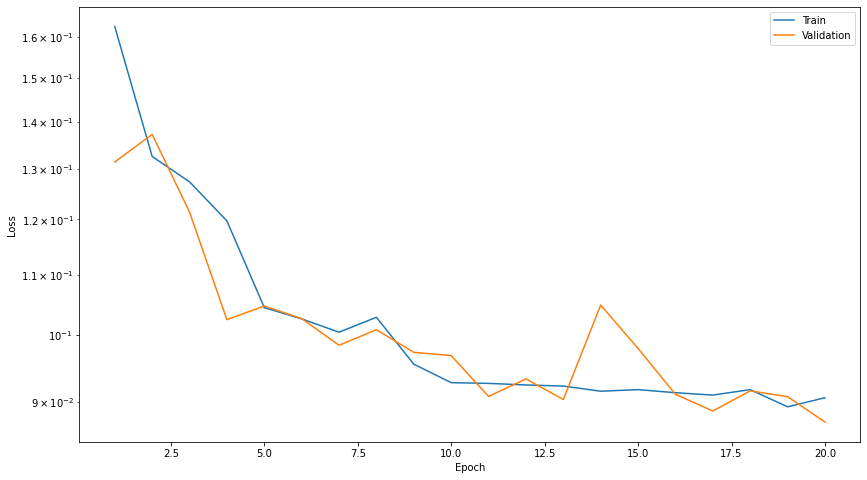

In [13]:
def plot_loss(hist):
    
    epoch_count = range(1, len(hist.history['loss']) + 1)
    
    plt.figure(figsize=(14,8))
    plt.semilogy(epoch_count, hist.history['loss'], label="Train")
    plt.semilogy(epoch_count, hist.history['val_loss'], label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    
plot_loss(perceptron_hist)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97    214478
           1       0.97      0.98      0.97    213558

    accuracy                           0.97    428036
   macro avg       0.97      0.97      0.97    428036
weighted avg       0.97      0.97      0.97    428036

True Negative:  207787
False Positive:  6691
False Negative:  4421
True Negative:  209137
True Positive Rate (Recall):  0.9792983639105067
True Negative Rate (Specificity):  0.9688033271477727
False Negative Rate:  0.020701636089493252
False Positive Rate:  0.03119667285222727
Precision:  0.9689984617380507


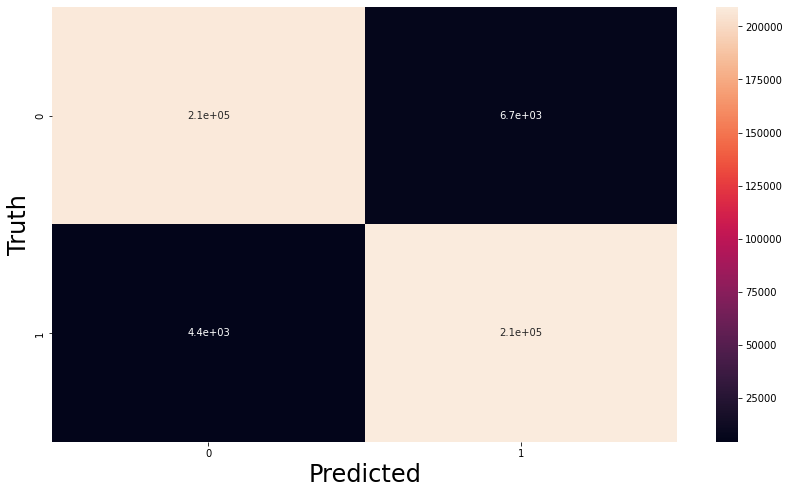

In [14]:
evaluate_model(Perceptron, x_test, y_test)

In [15]:
Perceptron2 = mlp_base(input_shape)
Perceptron2.summary()

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                        patience=1, 
                                                        verbose=1,
                                                        mode='max',
                                                        restore_best_weights=False)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 345       
                                                                 
 dense_4 (Dense)             (None, 2)                 12        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 360
Trainable params: 360
Non-trainable params: 0
_________________________________________________________________


In [16]:
perceptron2_hist = Perceptron2.fit(x_train, y_train, epochs=20, batch_size=10, validation_split=0.1, verbose=1, callbacks=[earlystopping])

Epoch 1/20
89888/89888 [==============================] - 180s 2ms/step - loss: 0.1361 - val_loss: 0.1212
Epoch 2/20
89888/89888 [==============================] - 183s 2ms/step - loss: 0.1165 - val_loss: 0.1181
Epoch 2: early stopping


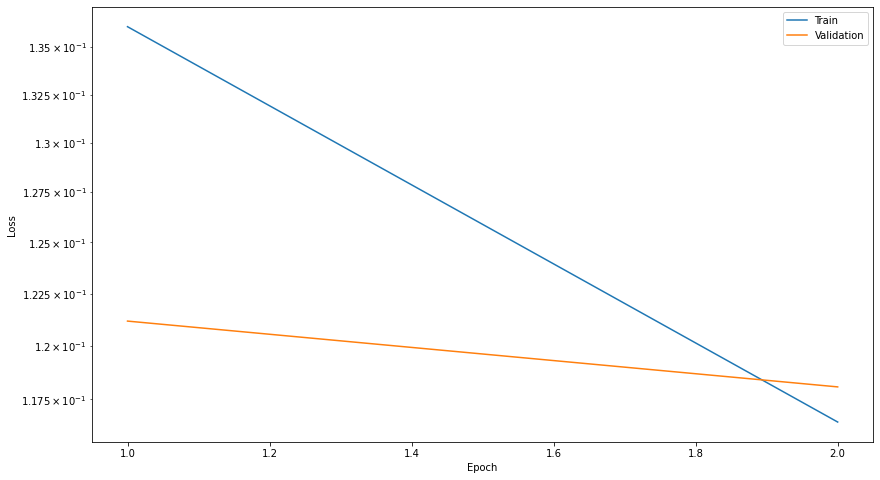

In [17]:
plot_loss(perceptron2_hist)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96    214478
           1       0.96      0.97      0.97    213558

    accuracy                           0.96    428036
   macro avg       0.97      0.96      0.96    428036
weighted avg       0.97      0.96      0.96    428036

True Negative:  204871
False Positive:  9607
False Negative:  5414
True Negative:  208144
True Positive Rate (Recall):  0.9746485732213263
True Negative Rate (Specificity):  0.9552075271123379
False Negative Rate:  0.02535142677867371
False Positive Rate:  0.04479247288766214
Precision:  0.955880799628934


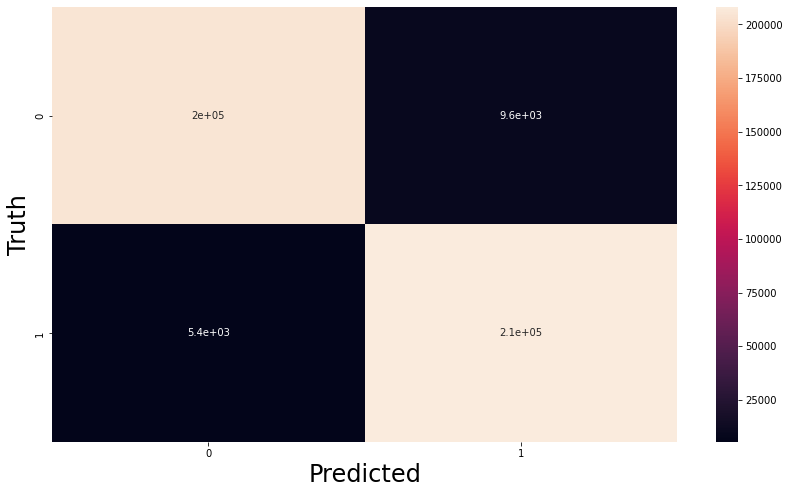

In [18]:
evaluate_model(Perceptron2, x_test, y_test)

### Save models

In [19]:
Perceptron.save('saved_models/perceptron1.h5')
Perceptron2.save('saved_models/perceptron2.h5')